In [ ]:
# いつものモジュールのインポート
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# 配布ファイルをインポートするために，ドライブをマウントする
from google.colab import drive
drive.mount('/content/drive')

# 検出力

A商店では，新製品のクッキー（A）の市場での評価を試験するために，試食会において従来品のクッキー（B)と比較して，どちらをより好むかについてのアンケートをとった．その結果が次の通りである．

| | A | B | 計 |
| ---- | ---- | ---- | ---- |
| どちらを好むか | 10 | 5 | 15 |

1. アンケートをとった人数（標本の大きさ）を$N$，Aのクッキーを好むとした人の割合を$p_{\text{sample}}$とする．\
まず，$N$（`N`），$p_{\text{sample}}$（`p_sample`）に，アンケートの結果から分かる適切な数値を入力せよ．\
次に，この標本から無作為に1人を抽出したとき，その1人の回答の仕方は二項分布$B(1,p_{\text{sample}})$に従うとみなせる．この分布の分散$v$を`v`に入力せよ．

この計算結果（$p_{\text{sample}}$，$v$）は，母集団（顧客全体）から無作為に1人を抽出したとき，Aを選択する確率$p$に関する推定量の分布を与える．

2. この結果から，新製品のクッキーがより好まれると結論付けてよいだろうか．
母集団におけるAを選択する確率$p$について，
$$
H_0 \colon p = 0.5, \quad H_1 \colon p > 0.5
$$
とし，有意水準$5\%$の右片側検定により，判断せよ．
ただし，母集団の分散は標本分散$v$に等しく既知であるとし，二項分布の正規分布への近似を利用し，z検定を行うこと．
また，検定の根拠となる`p_sample`及び`ppt`の値も明示すること．\
ヒント:
  1. 帰無仮説$H_0 \colon p = 0.5$に基づく，（右片側検定であるから）上位$5\%$点を`ppt`に格納するには，次の書式を利用する．
  ```
  ppt = stats.norm.ppf(0.95,loc=0.5,scale=標準偏差)
  ```
  （`stats.norm.ppf(x,loc=平均,scale=標準偏差)`は，正規分布で下から数えてxとなる$x$座標を与える．つまり累積分布関数の逆関数である）．\
  ここで，今回は標本数が`N`の標本調査を行っているため，標準偏差の計算にあたり，上で定義した`v`を直接利用するのではないことに注意されたい．また，平方根の計算には，`np.sqrt()`関数を利用せよ．

3. この検定の検出力を求めよ．
効果量は$\Delta = 0.1$とする．\
手順:
  1. 効果量`Delta`に，$0.1$を入力する．
  2. $H_1 \colon p = 0.5 + \Delta$のもとで，第2種の誤りを犯す確率$\beta$を求める．
  $H_1$が採択されるべきにも関わらず$H_0$が棄却できない確率が$\beta$であるから，$H_1$に基づく分布の下で，（右片側検定を行っているので）大きさ`N`の標本から求めた$p$の標本平均が上で求めた`ppt`を下回る確率を求めればよい．
  このためには，
  ```
  beta = stats.norm.cdf(ppt,loc=効果量を加味した母平均,scale=標準偏差)
  ```
  とすればよい（`stats.norm.cdf(x)`は`x`までの累積分布関数の値，`x`以下の確率の総和である）．
  3. 検出力は，効果量$\Delta$に基づく$1-\beta$で計算される．
  `1-beta`を出力せよ:
  ```
  print("Delta={}としたときのこの検定の検出力は，{:.4f}である．".format(Delta,1-beta))
  ```

4. この検定の検出力を$80\%$（$0.80$）としたいとき，次の考えに従って，適切な標本数（アンケート実施人数）$n$を求める式を入力し，計算結果を出力せよ．

  1. 帰無仮説$H_0 \colon p = 0.5$に基づいて$p = 0.5$とした母集団の分布における，上側$5\%$点$x_{\text{ppt}}$を与える式は
  $$
  x_{\text{ppt}} = 0.5 + z(0.05) \cdot \sqrt{ \frac{p(1-p)}{n} }  \quad (\text{$z(0.05)$は標準正規分布における上側$5\%$点を与える座標})
  $$
  である．
  今回は，問題の設定上，先に得られた標本分散を母分散として用いるため，上式の根号の中では$p = p_{\text{sample}}$として計算する．
  2. 効果量を$\Delta=0.1$とすると，$H_1 \colon p = 0.5 + \Delta$に基づく母集団の分布における，（右片側検定であるから）下側$20\%$点を与える式は
  $$
  x_{\text{beta_bound}} = 0.5 + \Delta - z(0.20) \cdot \sqrt{ \frac{p(1-p)}{n} }
  $$
  で与えられる．この式においても，根号の中では$p = p_{\text{sample}}$の値を用いる．
  3. $x_{\text{ppt}} = x_{\text{beta_bound}}$として，$n$に関する方程式とみなして，$n$について解く．
  実数解$n$に最も近い整数値（`round(n)`）が，今回求めるべき標本数である．
  
  ヒント:
  標準正規分布における上側$100\alpha\%$点$z(\alpha)$を求めるコードは（平均`0`，標準偏差`1`とすればよいから）
  ```
  stats.norm.ppt(1-0.05,loc=0,scale=1)
  ```
  を利用せよ．
  
  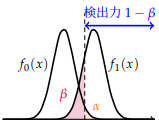

最後に，答え合わせのために，次のコードを実行してみよ（正しい`v`が，上のセルで入力されている必要がある）．

In [ ]:
for n in range(1,1000):
  beta = stats.norm.cdf(stats.norm.ppf(0.95,loc=0.5,scale=np.sqrt(v/n)),loc=0.5+Delta,scale=np.sqrt(v/n))
  print("n={}のとき，検出力は{:.4f}である．".format(n,1 - beta))

（考察）

# 対応のある検定

配布ファイル`116_Tempo.csv`に記録されている，2021年12月の神戸，大阪，京都の日毎平均気温のデータをもとに，この3地点の12月の気温について，差があるかどうか判断したい．

0. まずは，変数を標準化してt統計量をつくるための関数を用意しておく．
$$
t = \frac{m}{\sqrt{v/\nu}} \quad (\text{$m$: 平均，$v$: 標本分散，$\nu$: 標本の大きさ})
$$

In [ ]:
def t_val(m,v,nu): # m: 平均，v: 標本分散，nu: 標本の大きさ
  return m / np.sqrt(v / nu)

1. まず，`df1`に配布ファイル`116_Tempo.csv`のデータを読み込もう．
データの読み込みには，以下のコードを利用せよ．
```
df1 = pd.read_csv("/content/drive/MyDrive/.../116_Tempo.csv")
```
ここでの`"/content/drive/MyDrive/.../116_Tempo.csv"`は，配布された`116_Tempo.csv`のドライブ上の保存場所（パス）と配布データセットのファイル名を表す．
各自で適切なものを設定すること．

正しく読み込めているかを，`df1`の最初の数行を出力することで確認せよ．
コードは
```
df1.head()
```
が利用できる．

2. `df1`に，神戸と大阪の気温差
$$
(\text{大阪}) - (\text{神戸})
$$
の列を追加せよ．
列のタイトルは，「神戸vs大阪」とせよ．

  ヒント:
  1. データフレーム`df1`の「神戸」列のデータを取り出すには，`df1["神戸"]`とすればよい．
  2. データフレーム`df1`に，「神戸」列と「大阪」列の各データの和の列を「神戸+大阪」という列タイトルで追加するには，
  ```
  df1["神戸+大阪"] = df1["神戸"] + df1["大阪"]
  ```
  とすればよい．

3. データフレーム`df1`の「神戸vs大阪」列のデータの平均，不偏標本分散，標本の大きさをそれぞれ`mean_kobe_osaka`，`var_kobe_osaka`，`len_kobe_osaka`に格納し，その結果を表示せよ．

  ヒント:
  1. データの平均を求めるには，`np.mean(データ)`関数が使える．
  2. データの分散を求めるには，`np.var(データ,ddof=r)`関数が使える．
  ここで，`ddof`の値は，$(\text{標本数})-(\text{自由度})$，すなわち束縛条件の数である．
  今回は，`ddof=1`とする．
  3. 標本の大きさを求めるには，`len(データ)`が使える．

4. 神戸と大阪に気温差が認められるか否かについて，気温差が正規分布に従うと仮定し，
$$
H_0 \colon \mu_d = 0, \quad H_1 \colon \mu_d \neq 0 \qquad (\text{$\mu_d$は気温差の平均})
$$
として，有意水準$5\%$の両側t検定を行え．
検定の根拠となるt統計量，およびt分布の上側パーセント点も表示すること．

  ヒント:
  1. 神戸と大阪の気温差のt統計量は，上で定義した`t_val()`を使え．
  2. （両側検定であるから）自由度`n-1`のt分布の上側$100 \alpha / 2\%$点の座標を与える関数は，
  ```
  t_ppt = stats.t.ppf(1 - a/2, n - 1)
  ```
  を利用せよ．

5. 同様の手続きにより，神戸と京都に気温差があるか否かについて，
$$
H_0 \colon \mu_d = 0, \quad H_1 \colon \mu_d \neq 0
$$
とした有意水準$5%$の両側t検定を行え．

（考察）

# Welch's t-Test

配布ファイル`116_AvsB.csv`には，40人にA，Bの2種類の問題集を無作為に割り当てて使用してもらい，使用の前後に受験したテストの成績を記録している（データは架空です）．


1. まず，`df2`に配布ファイル`116_AvsB.csv`のデータを読み込もう．
データの読み込みには，以下のコードを利用せよ．
```
df2 = pd.read_csv("/content/drive/MyDrive/.../116_AvsB.csv")
```
ここでの`"/content/drive/MyDrive/.../116_AvsB.csv"`は，配布された`116_AvsB.csv`のドライブ上の保存場所（パス）と配布データセットのファイル名を表す．
各自で適切なものを設定すること．

正しく読み込めているかを，`df2`の最初の数行を出力することで確認せよ．

2. データフレーム`df2`に，「差分」という列タイトルで，「事前テスト」と「事後テスト」のそれぞれの差を計算した列を作れ．

3. データフレーム`df2`のデータのうち，使用問題集がAであるものBであるもののみを抜き出し，それぞれデータフレーム`df2_A`，`df2_B`に格納せよ．

  ヒント:
  1. データフレームの中から特定の条件を満たす行のみを取り出すには，`df2[条件]`を利用する．今回の場合，例えば「使用問題集」列にAが入力されている行のみを抜き出すので，条件は
  ```
  df2["使用問題集"] == "A"
  ```
  を用いればよい．
  2. 正しく抜き出せているかを見るには，`df2_A.head()`などを実行し，`df2_A`の中身を見るとよい．

4. データフレーム`df2_A`，`df2_B`における「差分」列のデータの平均，不偏標本分散，標本の大きさを取り出し，それぞれ`mean_X`，`var_X`，`len_X`（`X`は`A`，`B`のいずれか）とし，それらのデータを出力せよ．
分散計算において，自由度を加味することを忘れないように注意せよ．

5. 問題集Aを利用した群と問題集Bを利用した群の平均の差の分散を求め，`var_com`に格納せよ．
また，この計算結果をもとに，平均の差のt統計量`t_AB`を計算し，その値を出力せよ．

6. t検定を行うために，ウェルチの近似式から計算される値`nu_welch`を計算し，`nu_welch`に最も近い整数`nu_star`を求めよ．
ここで求めた`nu_star`が，次に行うt検定の自由度を与える．

7. 上で求めた自由度`nu_star`を用いて，問題集Aを用いたときの成績の上昇具合$\mu_A$，問題集Bを用いた時の成績の上昇具合$\mu_B$について，
$$
H_0 \colon \mu_A - \mu_B = 0, \quad H_1 \colon \mu_A - \mu_B \neq 0
$$
として有意水準$5\%$の両側t検定（Welch検定）を行え．

8. 効果量を`3`（つまり$3$点以上差があれば2つの問題集に差があるとみなすに十分でである）として，この検定の検定力を求めよ．
今回は両側検定を行っているので，$H_0$の採択域に注意せよ．

（考察）

# ＜本授業の学び＞
本授業で学んだことを，下のテキストボックスに記入して下さい．

（ここに本授業の学びを記入する）